# Pymaceuticals Inc.
---

### Analysis

The data analyzed starts with a mouse tumor study by merging and cleaning two datasets. It calculates summary statistics (mean, median, variance, standard deviation, and SEM) for tumor volumes across different drug regimens. 

Visualizations, including bar charts, pie charts, and boxplots, are used to display data distributions, gender balance, and identify tumor volume outliers. Line and scatter plots explore the relationship between tumor volume, time, and mouse weight. 

Finally, a correlation coefficient and linear regression model assess the link between weight and tumor volume. The analysis shows Capomulin and Ramicane as the most effective treatments and finds a moderate correlation between mouse weight and tumor size.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
try:
    mouse_metadata = pd.read_csv(mouse_metadata_path)
    study_results = pd.read_csv(study_results_path)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Combine the data into a single DataFrame
if "Mouse ID" not in mouse_metadata.columns or "Mouse ID" not in study_results.columns:
    print("Error: 'Mouse ID' column is missing from one or both input files.")
    exit()

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print("First 5 rows of merged data:")
print(merged_data.head())

First 5 rows of merged data:
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     a203    Infubinol  Female          20          23          0   
1     a203    Infubinol  Female          20          23          5   
2     a203    Infubinol  Female          20          23         10   
3     a203    Infubinol  Female          20          23         15   
4     a203    Infubinol  Female          20          23         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           48.508468                 0  
2           51.852437                 1  
3           52.777870                 1  
4           55.173336                 1  


In [3]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicate_mice = merged_data[duplicates]
print("Duplicate entries:")
print(duplicate_mice)

Duplicate entries:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
587     g989     Propriva  Female          21          26          0   
588     g989     Propriva  Female          21          26          5   
589     g989     Propriva  Female          21          26          5   
590     g989     Propriva  Female          21          26         10   
591     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
593     g989     Propriva  Female          21          26         15   
594     g989     Propriva  Female          21          26         20   
595     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
586           45.000000                 0  
587           45.000000                 0  
588           48.786801                 0  
589         

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
if not duplicate_mice.empty:
    duplicate_ids = duplicate_mice["Mouse ID"].unique()
    print(f"All data for duplicate Mouse IDs:\n{merged_data[merged_data['Mouse ID'].isin(duplicate_ids)]}")

All data for duplicate Mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
587     g989     Propriva  Female          21          26          0   
588     g989     Propriva  Female          21          26          5   
589     g989     Propriva  Female          21          26          5   
590     g989     Propriva  Female          21          26         10   
591     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
593     g989     Propriva  Female          21          26         15   
594     g989     Propriva  Female          21          26         20   
595     g989     Propriva  Female          21          26         20   
596     g989     Propriva  Female          21          26         25   
597     g989     Propriva  Female          21          26         30   
598     g989     Propriva  Fem

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique mice after cleaning: {num_mice_cleaned}")

Number of unique mice after cleaning: 249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean", median="median", variance="var", std_dev="std", SEM="sem"
)
print("Summary Statistics:")
summary_stats.head()

Summary Statistics:


,mean,median,variance,std_dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Generate a summary statistics table using the aggregation method
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean", 
    median="median", 
    variance="var", 
    std_dev="std", 
    SEM="sem"
)

# Display the summary statistics
print(summary_stats)


                   mean     median   variance   std_dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

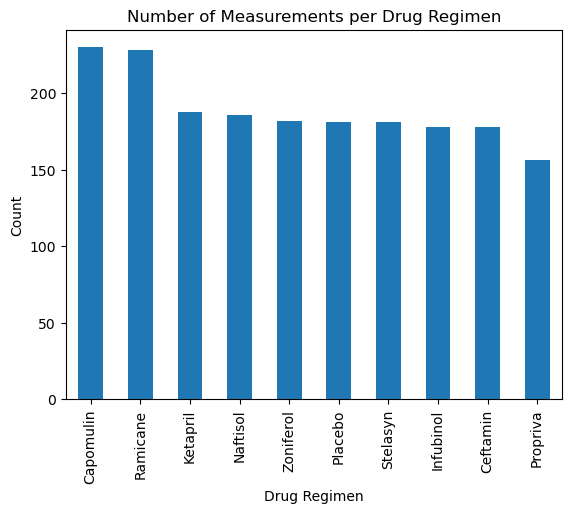

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", title="Number of Measurements per Drug Regimen", ylabel="Count", xlabel="Drug Regimen")
plt.show()

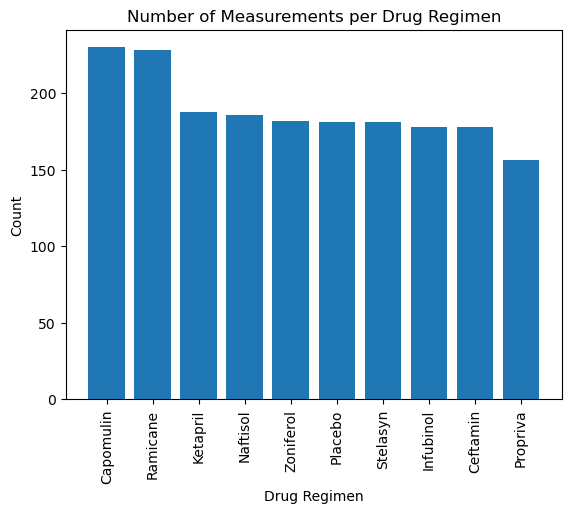

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Number of Measurements per Drug Regimen")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

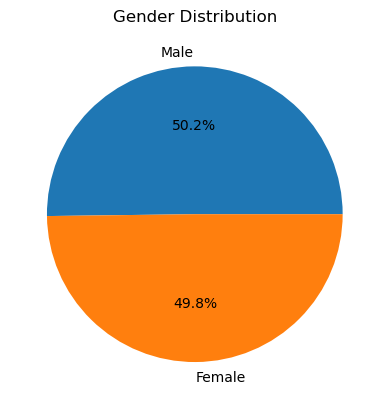

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = cleaned_data[["Mouse ID", "Sex"]].drop_duplicates()["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%", title="Gender Distribution")
plt.ylabel("")  
plt.show()


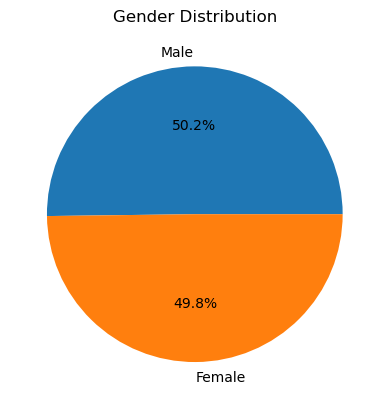

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volumes = cleaned_data.loc[
    cleaned_data.groupby("Mouse ID")["Timepoint"].idxmax()
]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [23]:
# Put treatments into a list for a for loop and for later use in plot labels
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment
for treatment in treatment_list:
    # Locate the rows for mice treated with the specific drug
    treatment_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the data to the list for plotting
    tumor_volume_data.append(treatment_data)
    
    # Calculate the IQR
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1
    
    # Determine potential outlier bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Identify any outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results for each treatment
    print(f"{treatment}:\nQ1: {q1}\nQ3: {q3}\nIQR: {iqr}")
    print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")
    print(f"Outliers:\n{outliers}\n")



Capomulin:
Q1: 32.37735684
Q3: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane:
Q1: 31.56046955
Q3: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol:
Q1: 54.04860769
Q3: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Outliers:
275    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin:
Q1: 48.72207785
Q3: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



/var/folders/s5/_24hbnqd3t7c2zyc8pb1j61h0000gn/T/ipykernel_87635/1337224520.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_data, labels=treatment_list, patch_artist=True)


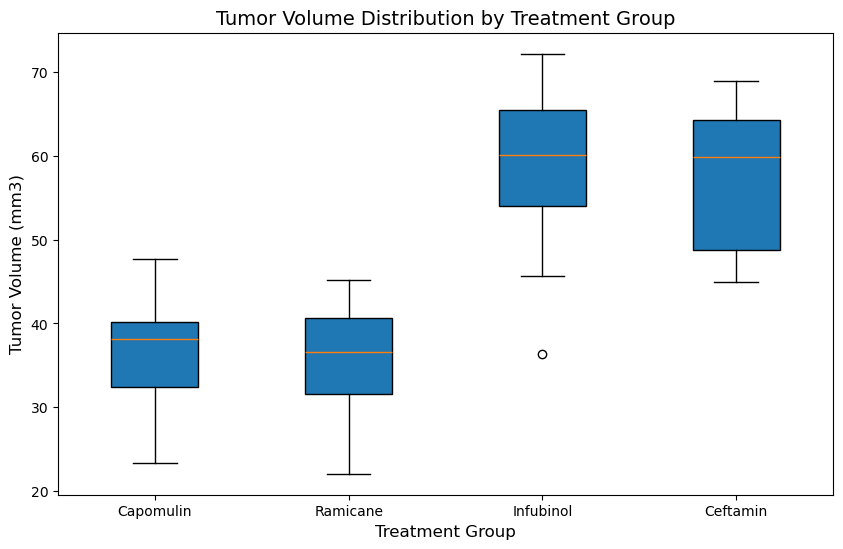

In [25]:
# Generate a box plot for the tumor volume distribution across treatment groups
plt.figure(figsize=(10, 6))

# Plot the tumor volume data for each treatment group
plt.boxplot(tumor_volume_data, labels=treatment_list, patch_artist=True)

# Add title and labels
plt.title("Tumor Volume Distribution by Treatment Group", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.xlabel("Treatment Group", fontsize=12)

# Display the plot
plt.show()

## Line and Scatter Plots

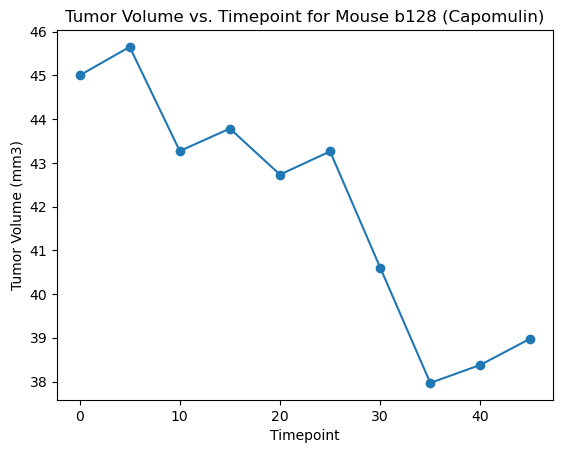

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].iloc[0]
mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

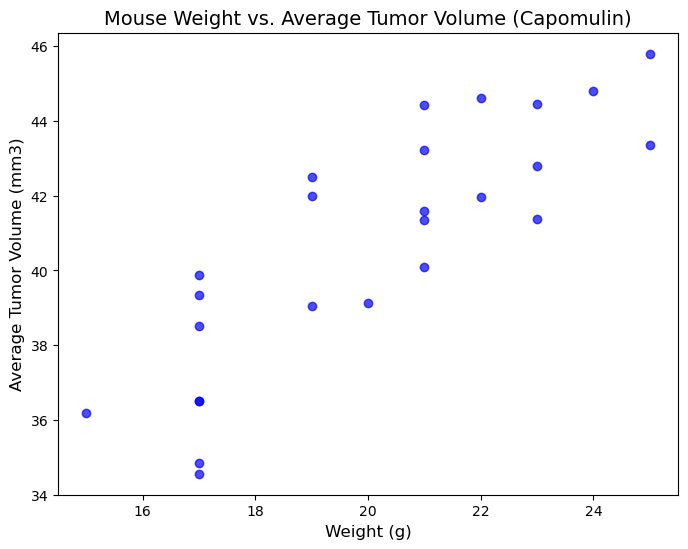

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse, only selecting numeric columns
avg_tumor_vol = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Generate a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"], color="blue", alpha=0.7)

# Add titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

# Show the plot
plt.show()



## Correlation and Regression

Correlation coefficient: 0.8419363424694721


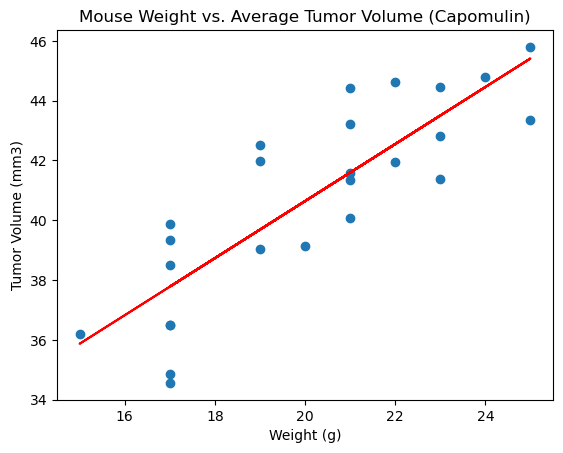

In [30]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = avg_tumor_vol["Weight (g)"]
y = avg_tumor_vol["Tumor Volume (mm3)"]
correlation = st.pearsonr(x, y)[0]
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x, y)
plt.plot(x, regress_values, color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()